In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import multivariate_normal
from IB import IB

In [5]:
plt.rcParams['figure.figsize'] = [6, 4]

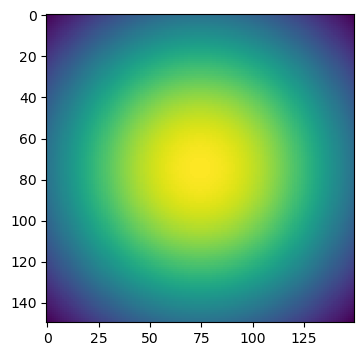

In [6]:
# create a nondeterministic map

sizeX = 150
dimX = 2
sizeY = 2

X  = [(i,j) for i in range(sizeX) for j in range(sizeX)] #feature space
Y = [0,1] #binary labels

px = np.array([[1./(sizeX*sizeX) for i in range(sizeX)] for j in range(sizeX)]) #uniform distribition over X

#create p(y|x), named py_x in code
x1,x2 = np.meshgrid(np.linspace(-1,1,sizeX),np.linspace(-1,1,sizeX))
pos = np.dstack((x1, x2))
rv = multivariate_normal(cov = [[1,0],[0,1]])
py_x = np.empty(x1.shape + (2,))
py_x[:,:,1] = rv.pdf(pos)
py_x[:,:,1] = py_x[:,:,1]/max([max(p) for p in py_x[:,:,1]])
py_x[:,:,0] = -py_x[:,:,1] +1

#compute p(x,y)
pxy = py_x/np.sum(py_x)
plt.imshow(pxy[:,:,1])

In [3]:
qt_x, Ix_t, Iy_t, change, n  = IB(pxy, px, py_x, X, 0.5, 100,0.1)


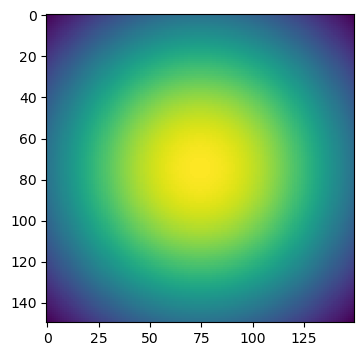

In [7]:
plt.imshow(qt_x[:,:,1])

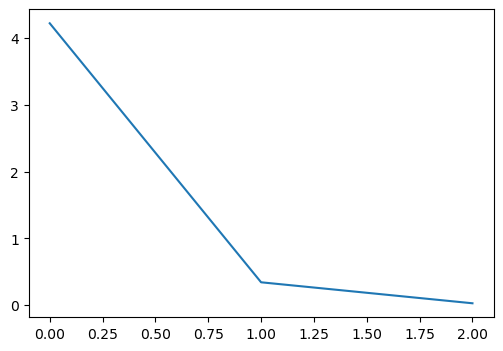

3


In [8]:
plt.plot(change[1:n+1])
plt.show()
print(n)

In [13]:
N=100
betas = [0.5,1.5,2,2.5,3,4,6,8,12,16,30,40,50,60,80,100,200,300]
b = len(betas)
changes = np.zeros((b,N))
qt_xs = np.zeros((b,)+ py_x.shape)
Ixts = np.zeros(b)
Iyts = np.zeros(b)
ns = np.zeros(b)
for i in range(b):
    qt_xs[i], Ixts[i], Iyts[i], changes[i,:], ns[i] = IB(pxy, px, py_x, X,Y, betas[i], N)
    #plt.scatter(Ixts[i],Iyts[i], label= (betas[i],ns[i]))
#plt.legend()
#plt.show()
#print(ns)

In [33]:
_, Ixt200, Iyts200, _ ,_,n = IB(pxy, px, py_x, X,Y, 1000, N)
print(Ixt200, Iyts200)
print(n)

0.9699616995255778 0.061020251615020074
19


In [34]:
py = np.array([np.mean(py_x[:,:,y]) for y in Y])
Ixy = 0.
for y in Y:
    if py[y] > 0:
        for x in X:
            if py_x[x+(y,)] > 0:
                    Ixy += py_x[x+(y,)]*px[x]*math.log2(py_x[x+(y,)]/(py[y]))
print(Ixy)

0.09023495403791325


In [10]:

py_y = np.array([[np.sum(pxy[:,:,y]*py_x[:,:,t])/py[t] for y in Y] for t in Y ])
Iyy = 0.
for y in Y:
    if py[y] > 0:
        for t in Y:
            if py_y[t,y] > 0:
                Iyy += py_y[y,t]*py[t]*math.log2(py_y[y,t]/py[y])
print(Iyy)

0.5586335901415427


In [35]:
n = 100
x = np.linspace(0,1,n)
y = np.zeros(n)

for i in range(n):
    y[i] = Ixy

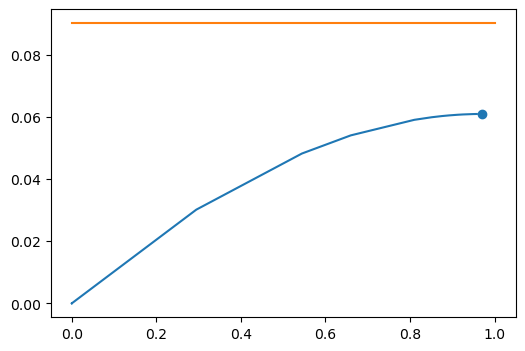

In [37]:
plt.plot(Ixts,Iyts)
plt.scatter(Ixt200,Iyts200)
plt.plot(x,y)
plt.show()

In [8]:
py = np.array([np.sum(pxy[:,:,y]) for y in Y])
Hy = sum(-py[y]*math.log2(py[y]) for y in Y)
print(Hy)

0.991911254613748


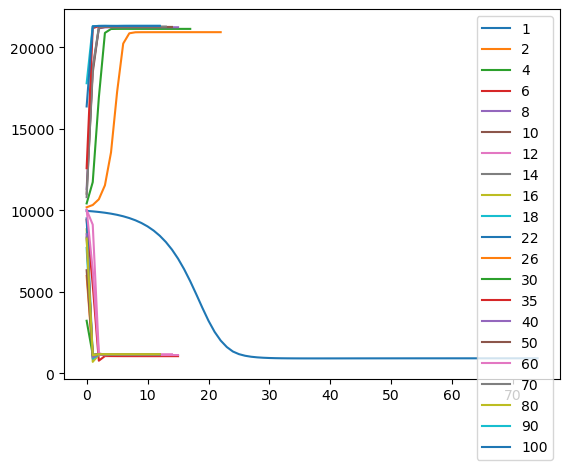

In [9]:
for i in range(b):
    plt.plot(scores[i,:int(ns[i])], label= betas[i])
plt.legend()
plt.show()

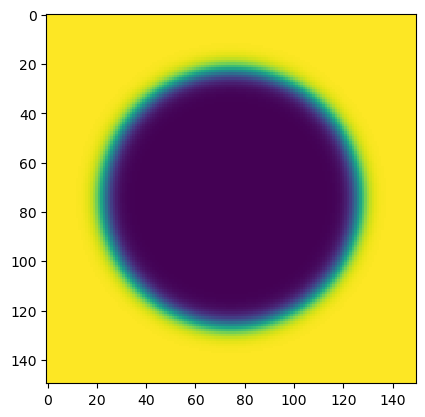

In [12]:
plt.imshow(qt_xs[10,:,:,1])
plt.show()

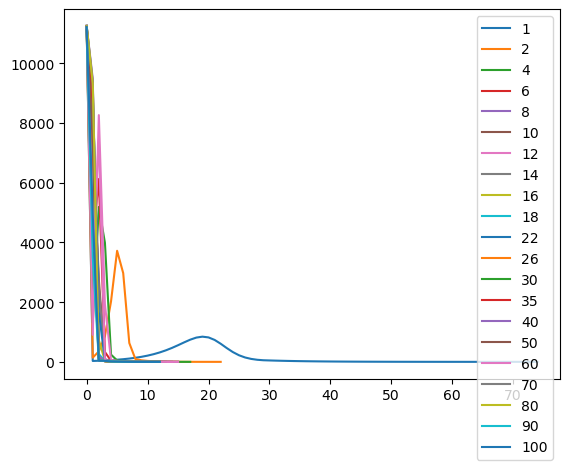

In [11]:
for i in range(b):
    plt.plot(changes[i,:int(ns[i])], label= betas[i])
plt.legend()
plt.show()